# Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../datasets/bank/bank.csv", sep = ";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
data["y"] = (data["y"]=="yes").astype(int)

In [7]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [8]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [10]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [11]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [12]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [13]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


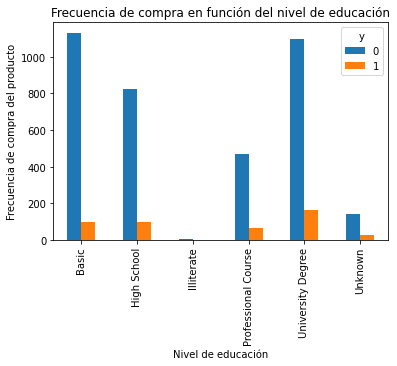

In [14]:
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")
plt.show()

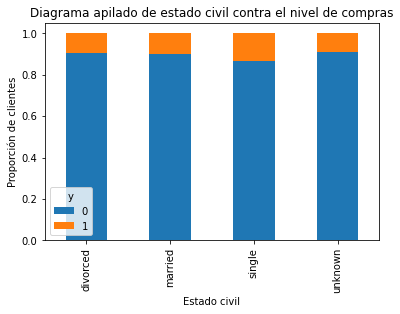

In [15]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(axis=1).astype("float"), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")
plt.show()

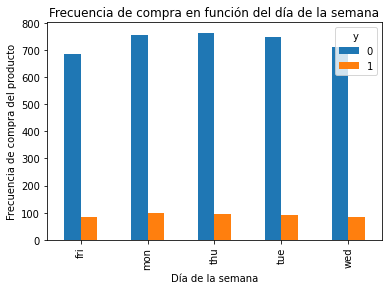

In [16]:
pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")
plt.show()

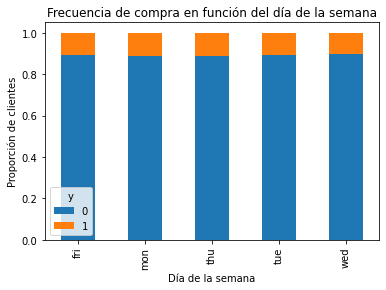

In [17]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(axis=1).astype("float"), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Proporción de clientes")
plt.show()

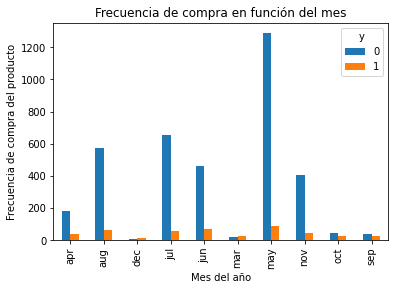

In [18]:
pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")
plt.show()

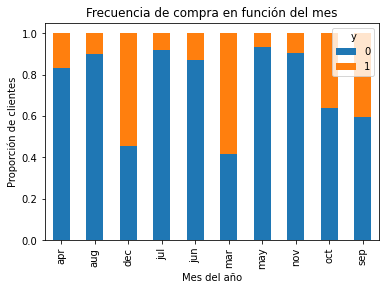

In [19]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(axis=1).astype("float"), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Proporción de clientes")
plt.show()

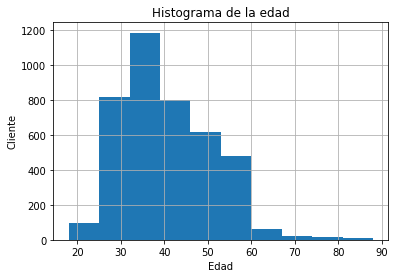

In [20]:
data.age.hist()
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")
plt.show()

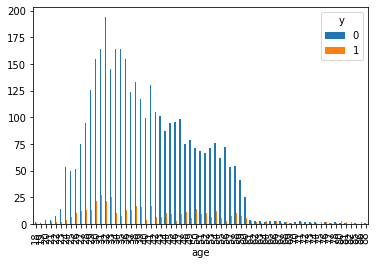

In [21]:
pd.crosstab(data.age, data.y).plot(kind="bar")
plt.show()

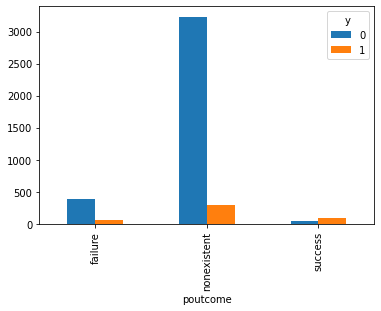

In [22]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")
plt.show()

## Conversión de las variables categóricas a dummies

In [23]:
categories = ["job", "marital", "education",
              "housing", "loan", "contact",
              "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [24]:
data_vars = data.columns.values.tolist()

In [25]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]] # Eliminar columna default

In [26]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [27]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ["y"]
X = [v for v in bank_data_vars if v not in Y]

## Selección de rasgos para el modelo

In [28]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
# Hay que añadir un max_iter alto si no salta warning
lr = LogisticRegression(max_iter=3000)

In [30]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [31]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False  True False False  True  True  True
 False False False False False False False  True False  True]


In [32]:
print(rfe.ranking_)

[37 44 22 47  1 20 29 25  1 40 27  4  1 14  1 42  1  6 35 32 19  8 23 36
 34 46 45 17  7 26 43  9 11 24 28 15 18 31 10  3  1  5  1 39  2  1  1  1
 13 21 41 30 38 33 12  1 16  1]


In [33]:
z = list(zip(bank_data_vars, rfe.support_, rfe.ranking_))
z

[('age', False, 37),
 ('duration', False, 44),
 ('campaign', False, 22),
 ('pdays', False, 47),
 ('previous', True, 1),
 ('emp.var.rate', False, 20),
 ('cons.price.idx', False, 29),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 40),
 ('y', False, 27),
 ('job_admin.', False, 4),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 14),
 ('job_housemaid', True, 1),
 ('job_management', False, 42),
 ('job_retired', True, 1),
 ('job_self-employed', False, 6),
 ('job_services', False, 35),
 ('job_student', False, 32),
 ('job_technician', False, 19),
 ('job_unemployed', False, 8),
 ('job_unknown', False, 23),
 ('marital_divorced', False, 36),
 ('marital_married', False, 34),
 ('marital_single', False, 46),
 ('marital_unknown', False, 45),
 ('education_Basic', False, 17),
 ('education_High School', False, 7),
 ('education_Illiterate', False, 26),
 ('education_Professional Course', False, 43),
 ('education_University Degree', False, 9),
 ('education_Unkn

In [34]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_housemaid",
        "job_retired", "month_aug", "month_dec", "month_jun", "month_mar",
        "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [35]:
X = bank_data[cols]
Y = bank_data["y"]

## Implementación del modelo en Python con statsmodels.api

In [36]:
import statsmodels.api as sm

In [37]:
logit_model = sm.Logit(Y, X)

In [38]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.295134
         Iterations 7


In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Thu, 11 Aug 2022   Pseudo R-squ.:                  0.1457
Time:                        01:07:15   Log-Likelihood:                -1215.7
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                 5.020e-82
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                -0.0868      0.069     -1.265      0.206      -0.221       0.048
euribor3m               -0.5290      0.035    -15.144      0.000      -0.597      -0.461
job_blue-collar         -0.5583      0.152     -3.685      0.000      -0.855      -0.261
job_housemaid            0.0522      0.344      0.152      0.879      -0.622       0.726
job_retired              0.2789      0.217      1.285      0.199      -0.146       0.704
month_aug                0.3555      0.166      2.140      0.032       0.030       0.681
month_dec                1.0321      0.448      2.302      0.021       0.154       1.911
month_jun                0.8173      0.165      4.966      0.000       0.495       1.140
month_mar                1.5144      0.312      4.854      0.000       0.903       2.126
month_nov                0.1279      0.186      0.686      0.493      -0.237       0.493
day_of_week_wed         -0.0500      0.138     -0.363      0.717      -0.320       0.220
poutcome_nonexistent    -0.7528      0.120     -6.257      0.000      -0.989      -0.517
========================================================================================
"""

In [40]:
result.summary2() # Versión más actualizada

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.146     
Dependent Variable:   y                 AIC:               2455.3119 
Date:                 2022-08-11 01:07  BIC:               2531.1923 
No. Observations:     4119              Log-Likelihood:    -1215.7   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       5.0196e-82
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.0868   0.0686  -1.2648 0.2059 -0.2212  0.0477
euribor3m            -0.5290   0.0349 -15.1435 0.0000 -0.5975 -0.4605
job_blue-collar      -0.5583   0.1515  -3.6850 0.0002 -0.8552 -0.2614
job_housemaid         0.0522   0.3437   0.1519 0.8793 -0.6215  0.7259
job_retired           0.2789   0.2170   1.2852 0.1987 -0.1464  0.7043
month_aug             0.3555   0.1661   2.1397 0.0324  0.0299  0.6811
month_dec             1.0321   0.4483   2.3025 0.0213  0.1535  1.9108
month_jun             0.8173   0.1646   4.9660 0.0000  0.4947  1.1399
month_mar             1.5144   0.3120   4.8539 0.0000  0.9029  2.1259
month_nov             0.1279   0.1864   0.6860 0.4927 -0.2375  0.4932
day_of_week_wed      -0.0500   0.1379  -0.3628 0.7168 -0.3204  0.2203
poutcome_nonexistent -0.7528   0.1203  -6.2574 0.0000 -0.9886 -0.5170
=====================================================================

"""

## Implementación del modelo en Python con scikit-learn

In [41]:
from sklearn import linear_model

In [42]:
logit_model = linear_model.LogisticRegression()

In [43]:
logit_model.fit(X, Y)

LogisticRegression()

In [44]:
logit_model.score(X, Y)

0.8956057295460063

In [45]:
1 - Y.mean()

0.8905074047098811

In [46]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5650201986577605]
1,euribor3m,[-0.4728729223206968]
2,job_blue-collar,[-0.4000169899770564]
3,job_housemaid,[0.03878353233471377]
4,job_retired,[0.4102405844805006]
5,month_aug,[0.38722052902913695]
6,month_dec,[1.1093721124181315]
7,month_jun,[0.8089757389044745]
8,month_mar,[1.5263578042890549]
9,month_nov,[0.2200410686701946]


## Validación del modelo logístico

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [49]:
lm = LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [50]:
from IPython.display import display, Math, Latex

In [51]:
display(Math(r'Y_p = \begin{cases} 0& si\ p\leq 0.5\\ 1& si\ p > 0.5 \end{cases}'))

<IPython.core.display.Math object>

In [52]:
probs = lm.predict_proba(X_test)

In [53]:
probs

array([[0.95042472, 0.04957528],
       [0.82340937, 0.17659063],
       [0.92400907, 0.07599093],
       ...,
       [0.67675679, 0.32324321],
       [0.9628061 , 0.0371939 ],
       [0.56200429, 0.43799571]])

In [54]:
prediction = lm.predict(X_test)

In [55]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
display(Math(r'\varepsilon \in (0, 1), Y_p = \begin{cases} 0& si\ p\leq \varepsilon \\ 1& si\ p > \varepsilon \end{cases}'))

<IPython.core.display.Math object>

In [57]:
# Venta a partir de un 10%
prob = probs[:, 1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.049575,0
1,0.176591,1
2,0.075991,0
3,0.035477,0
4,0.044271,0


In [58]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [59]:
390/len(prob_df) * 100

31.55339805825243

In [60]:
# Probando con el 15%
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,898
1,338


In [61]:
331/len(prob_df) * 100

26.779935275080906

In [62]:
# Probando con el 5%
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,495
1,741


In [63]:
741/len(prob_df) * 100

59.95145631067961

In [64]:
from sklearn import metrics

In [65]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

## Validación cruzada

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
scores = cross_val_score(LogisticRegression(), X, Y, scoring="accuracy", cv=10)

In [68]:
scores

array([0.90291262, 0.88834951, 0.90291262, 0.89563107, 0.90048544,
       0.89320388, 0.88592233, 0.89320388, 0.88592233, 0.89051095])

In [69]:
scores.mean()

0.89390546382255

## Matrices de Confusión y curvas ROC

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [71]:
lm = LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [72]:
probs = lm.predict_proba(X_test)

In [73]:
prob = probs[:, 1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] >= threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.049575,0,0
1,0.176591,1,0
2,0.075991,0,0
3,0.035477,0,0
4,0.044271,0,0


In [74]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [75]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

In [76]:
sens = TP/(TP+FN)
sens

0.6721311475409836

In [77]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.2764811490125674

In [78]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.30, 0.40, 0.50]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df = pd.DataFrame(prob)
    prob_df["prediction"] = np.where(prob_df[0] >= t, 1, 0)
    prob_df["actual"] = list(Y_test)

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)
    
sensitivities.append(0)
especifities_1.append(0)

In [79]:
sensitivities

[1,
 0.8442622950819673,
 0.8360655737704918,
 0.7131147540983607,
 0.6721311475409836,
 0.6721311475409836,
 0.6475409836065574,
 0.5737704918032787,
 0.5245901639344263,
 0.3770491803278688,
 0.30327868852459017,
 0.1557377049180328,
 0.10655737704918032,
 0]

In [80]:
especifities_1

[1,
 0.618491921005386,
 0.573608617594255,
 0.3671454219030521,
 0.2764811490125674,
 0.27558348294434465,
 0.23249551166965887,
 0.16157989228007186,
 0.12298025134649915,
 0.07360861759425497,
 0.05116696588868941,
 0.021543985637342944,
 0.012567324955116699,
 0]

In [81]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

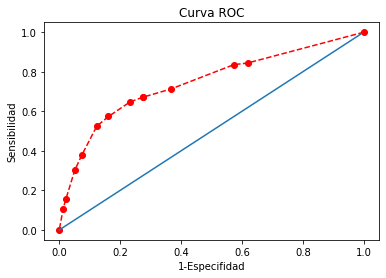

In [82]:
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x, y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [83]:
from sklearn import metrics
from ggplot import *

In [84]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [85]:
df = pd.DataFrame({
    "esp" : espc_1,
    "sens" : sensit
})

In [86]:
df.head()

,esp,sens
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.024590
3,0.000000,0.032787
4,0.001795,0.032787


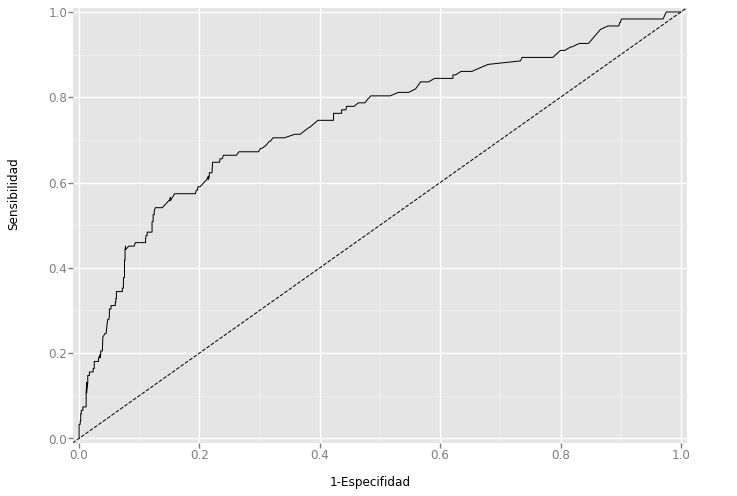

<ggplot: (-9223371920747774560)>

In [87]:
ggplot(df, aes(x="esp", y="sens")) + geom_line() + geom_abline(linetype="dashed") + xlim(-0.01, 1.01) + ylim(-0.01, 1.01) + xlab("1-Especifidad") + ylab("Sensibilidad")

In [88]:
auc = metrics.auc(espc_1, sensit)
auc

0.7459641816522942

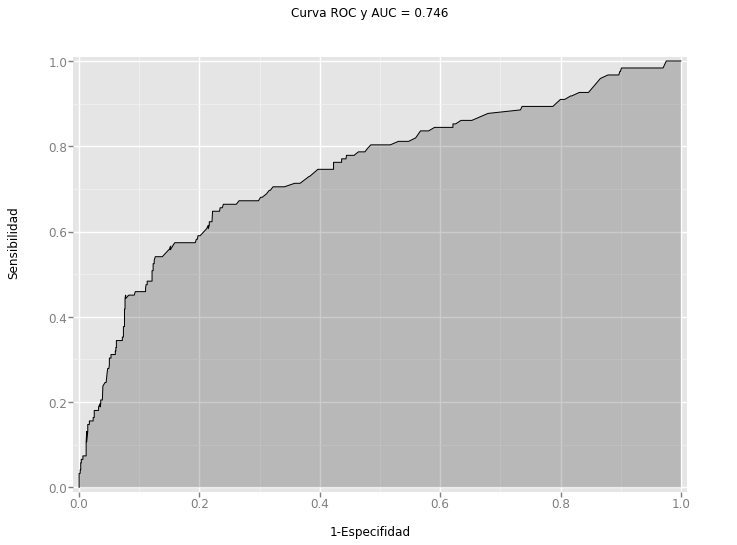

<ggplot: (-9223371920747753148)>

In [89]:
ggplot(df, aes(x="esp", y="sens")) + geom_area(alpha=0.25) + geom_line(aes(y="sens")) + ggtitle("Curva ROC y AUC = {}".format(round(auc, 3))) + xlim(-0.01, 1.01) + ylim(-0.01, 1.01) + xlab("1-Especifidad") + ylab("Sensibilidad")